In [1]:
import os
import tensorflow as tf

In [8]:
pre_trained_model = tf.keras.models.load_model('my_model')
pre_trained_model.load_weights('my_model1_weights.h5',by_name=True)

In [9]:
for layer in pre_trained_model.layers:
    layer.trainable=False
pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       7

In [12]:
last_layer = pre_trained_model.get_layer('max_pooling2d_5')
print('last layer output shape: ', last_layer.output_shape)
last_output=last_layer.output

last layer output shape:  (None, 4, 4, 128)


In [17]:
from tensorflow.keras.optimizers import RMSprop
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense  (1,activation='sigmoid')(x)
model = tf.keras.Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0   

In [19]:
!kaggle datasets download -d sanikamal/horses-or-humans-dataset


  0%|          | 0.00/307M [00:00<?, ?B/s]
  0%|          | 1.00M/307M [00:00<00:52, 6.16MB/s]
  1%|          | 3.00M/307M [00:00<00:42, 7.56MB/s]
  1%|1         | 4.00M/307M [00:00<00:39, 8.12MB/s]
  2%|1         | 6.00M/307M [00:00<00:35, 8.88MB/s]
  3%|2         | 8.00M/307M [00:00<00:33, 9.40MB/s]
  3%|3         | 10.0M/307M [00:00<00:31, 9.93MB/s]
  4%|3         | 11.0M/307M [00:01<00:31, 9.80MB/s]
  4%|4         | 13.0M/307M [00:01<00:30, 10.2MB/s]
  5%|4         | 15.0M/307M [00:01<00:29, 10.6MB/s]
  6%|5         | 17.0M/307M [00:01<00:28, 10.6MB/s]
  6%|6         | 19.0M/307M [00:01<00:27, 11.1MB/s]
  7%|6         | 21.0M/307M [00:01<00:26, 11.2MB/s]
  7%|7         | 23.0M/307M [00:02<00:27, 10.8MB/s]
  8%|8         | 25.0M/307M [00:02<00:26, 11.1MB/s]
  9%|8         | 27.0M/307M [00:02<00:26, 11.2MB/s]
  9%|9         | 29.0M/307M [00:02<00:27, 10.6MB/s]
 10%|#         | 31.0M/307M [00:02<00:26, 10.8MB/s]
 11%|#         | 33.0M/307M [00:03<00:25, 11.3MB/s]
 11%|#1        | 35.

In [20]:
!unzip -q horses-or-humans-dataset.zip

In [21]:
train_dir = 'C:/Users/Mahesh DY/horse-or-human/train'
validation_dir = 'C:/Users/Mahesh DY/horse-or-human/validation'

train_horses_dir = os.path.join(train_dir, 'horses')
train_humans_dir = os.path.join(train_dir, 'humans')
validation_horses_dir = os.path.join(validation_dir, 'horses')
validation_humans_dir = os.path.join(validation_dir, 'humans')

train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print(len(train_horses_fnames))
print(len(train_humans_fnames))
print(len(validation_horses_fnames))
print(len(validation_horses_fnames))

500
527
128
128


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255 )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(300,300))     


validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(300,300))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [45]:
print(len(train_generator))

52


In [50]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=1027//20,
                    epochs=3,
                    validation_steps=256//20,
                    verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 51 steps, validate for 12 steps
Epoch 1/3
51/51 [==============================] - 100s 2s/step - loss: 0.6141 - acc: 0.7259 - val_loss: 0.5820 - val_acc: 0.8375
Epoch 2/3
51/51 [==============================] - 99s 2s/step - loss: 0.5110 - acc: 0.7448 - val_loss: 0.6057 - val_acc: 0.8250
Epoch 3/3
51/51 [==============================] - 101s 2s/step - loss: 0.5043 - acc: 0.7567 - val_loss: 0.6448 - val_acc: 0.8042


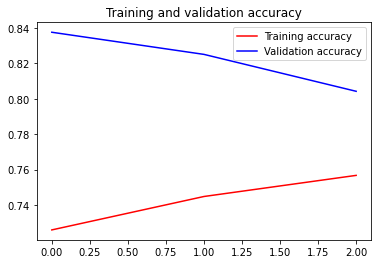

<Figure size 432x288 with 0 Axes>

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()